In [1]:
# Machine Learning Library
import pandas as pd
import numpy as np
import pickle
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score
plt.style.use('ggplot')

In [58]:
# Deep Learning Library
from keras.models import Sequential, Model
from keras.layers import Input, Embedding, LSTM, Dense, Dropout, SimpleRNN, GRU, Bidirectional, BatchNormalization, SpatialDropout1D
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.text import one_hot,Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [3]:
train_data = pd.read_csv("shuffled_data_file.txt", header = None, sep=";", names=["Sl_No","Comment", "Psy_Emotion","Categorical_Emotion"], encoding="utf-8")

In [4]:
train_data.drop(['Sl_No','Categorical_Emotion'], axis=1, inplace=True)

In [5]:
train_data.head()

Comment              Psy_Emotion
0        Treated myself to a movie night for Rs 500.        Emotional Comfort
1  Invested Rs 3200 in cryptocurrency for potenti...  Experiential Investment
2  Planned a fun-filled day trip with family, spe...            Social Outlay
3                Invested Rs 7980 in cryptocurrency.  Experiential Investment
4                     Invested Rs 5600 in a startup.  Experiential Investment

In [6]:
train_data.shape

(1003, 2)

In [7]:
train_data.isnull().sum()

Comment        0
Psy_Emotion    0
dtype: int64

In [8]:
train_data.duplicated().sum()

127

In [9]:
train_data.drop_duplicates(inplace=True)

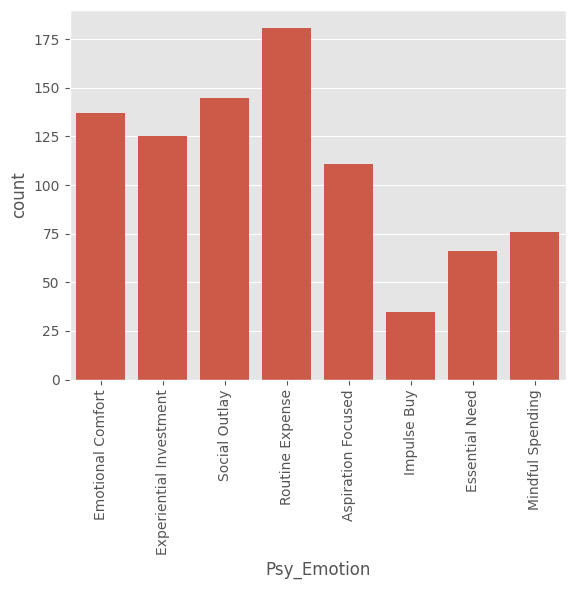

In [10]:
sns.countplot(x = train_data['Psy_Emotion'])
plt.xticks(rotation=90)
plt.show()

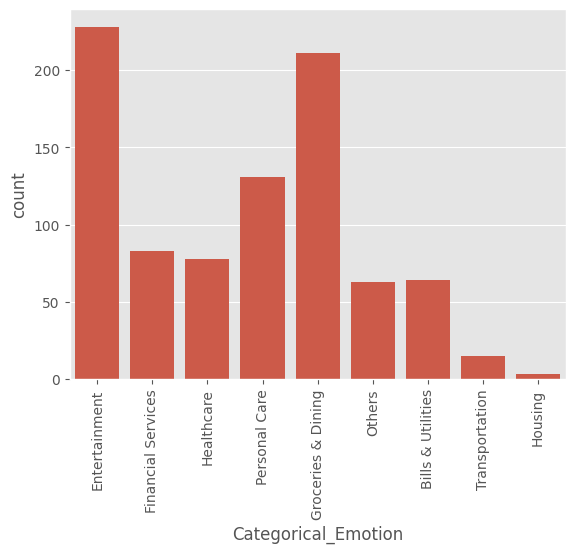

In [ ]:
sns.countplot(x = train_data['Categorical_Emotion'])
plt.xticks(rotation=90)
plt.show()

In [11]:
train_data['Psy_Emotion'].value_counts()

Psy_Emotion
Routine Expense            181
Social Outlay              145
Emotional Comfort          137
Experiential Investment    125
Aspiration Focused         111
Mindful Spending            76
Essential Need              66
Impulse Buy                 35
Name: count, dtype: int64

In [ ]:
train_data['Categorical_Emotion'].value_counts()

Categorical_Emotion
Entertainment         228
Groceries & Dining    211
Personal Care         131
Financial Services     83
Healthcare             78
Bills & Utilities      64
Others                 63
Transportation         15
Housing                 3
Name: count, dtype: int64

In [12]:
train_data['length'] = [len(x) for x in train_data['Comment']]

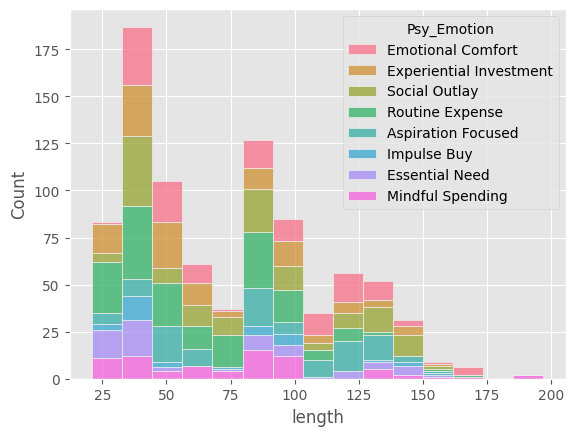

In [13]:
# data distribution
df2 = train_data.copy()
df2['length'] = [len(x) for x in df2['Comment']]

# Convert the 'length' column to a numpy array
length_values = df2['length'].values

# Use sns.histplot instead of sns.kdeplot for simplicity
sns.histplot(data=df2, x='length', hue='Psy_Emotion', multiple='stack')

plt.show()

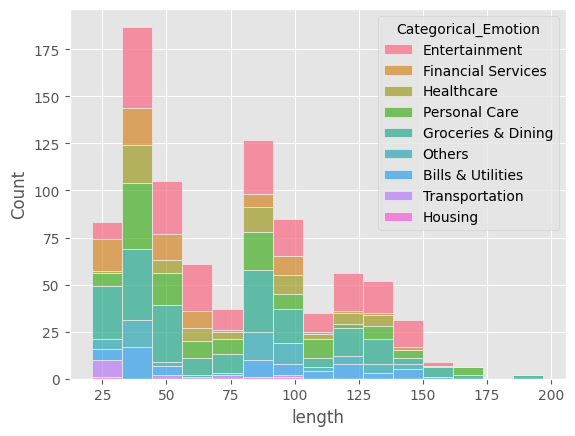

In [ ]:
# Use sns.histplot instead of sns.kdeplot for simplicity
sns.histplot(data=df2, x='length', hue='Categorical_Emotion', multiple='stack')

plt.show()

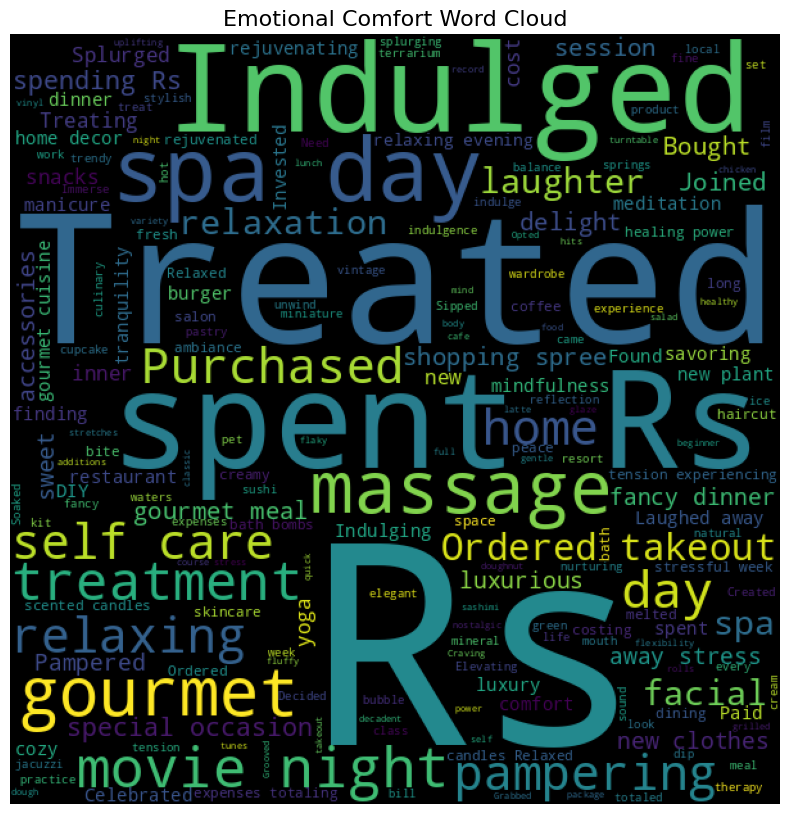

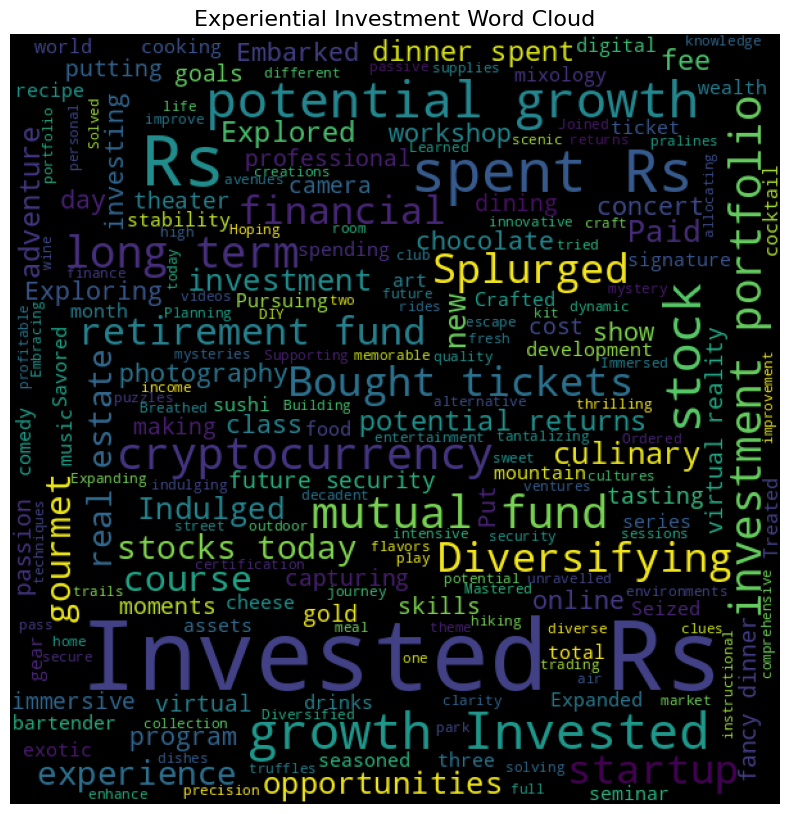

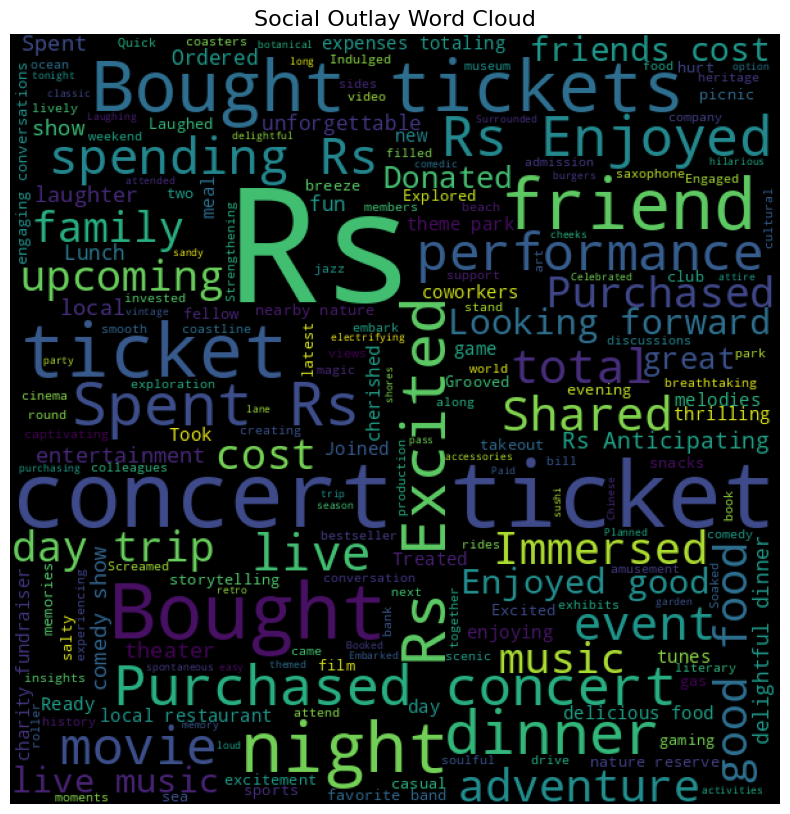

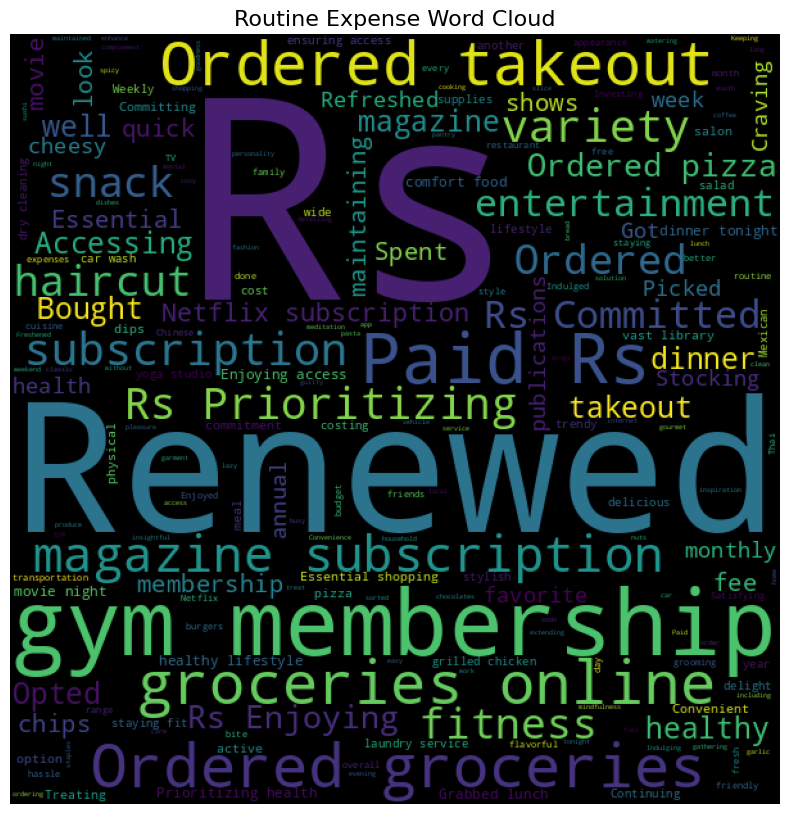

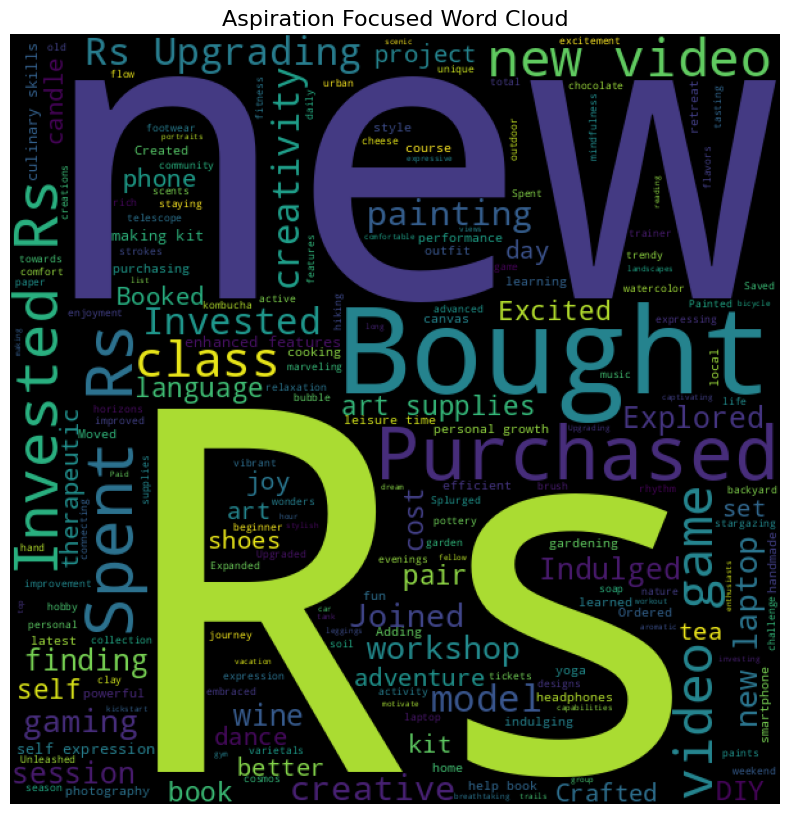

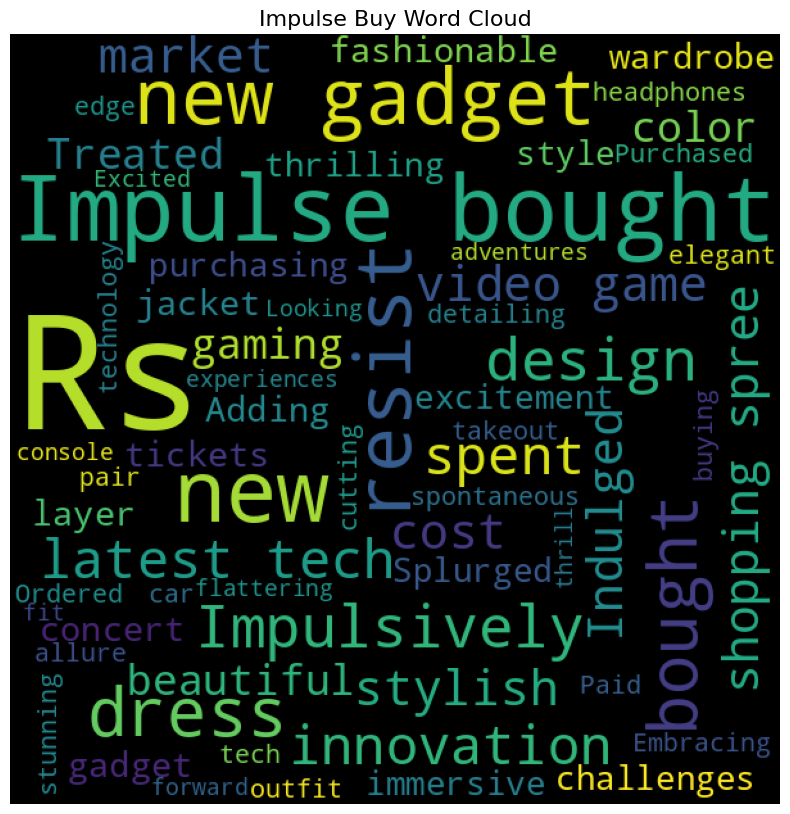

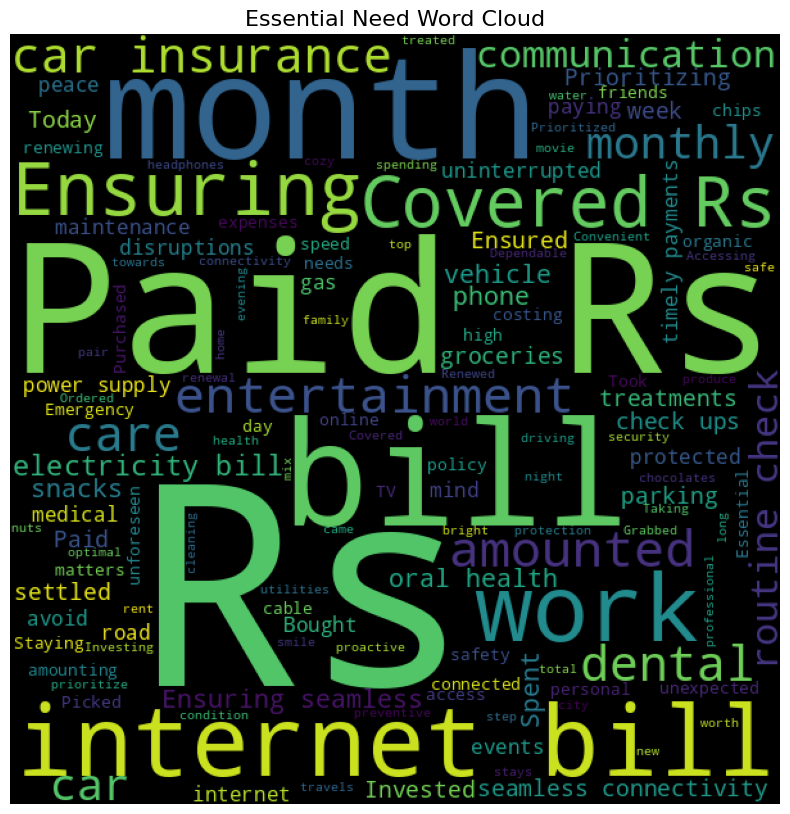

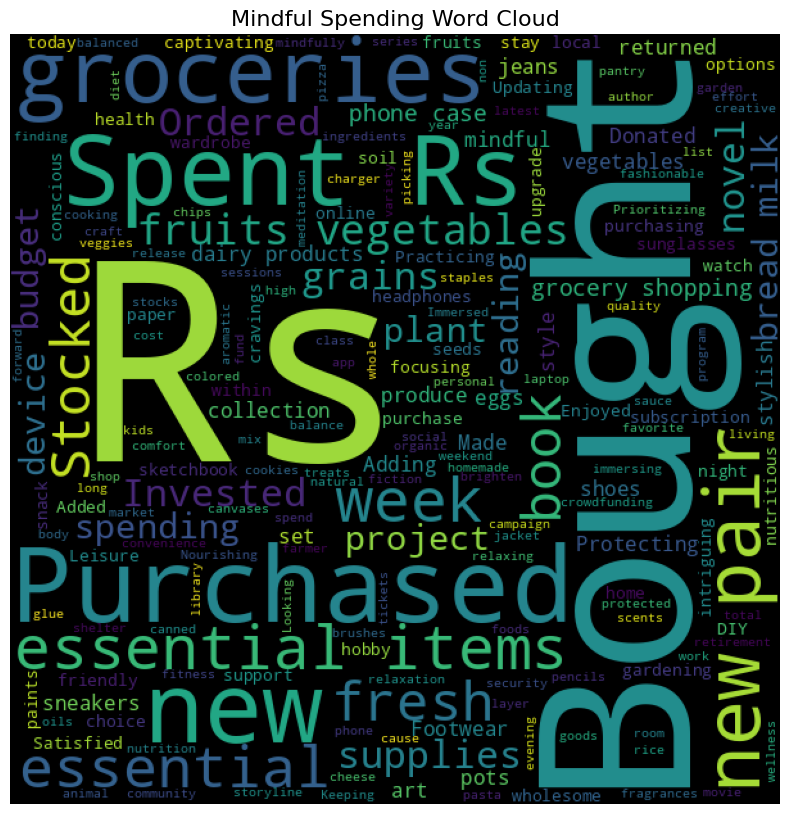

In [14]:
# Words cloud for each emotions
def words_cloud(wordcloud, df):
    plt.figure(figsize=(10, 10))
    plt.title(df+' Word Cloud', size = 16)
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");
emotions_list = train_data['Psy_Emotion'].unique()
for emotion in emotions_list:
    text = ' '.join([sentence for sentence in train_data.loc[train_data['Psy_Emotion'] == emotion,'Comment']])
    wordcloud = WordCloud(width = 600, height = 600).generate(text)
    words_cloud(wordcloud, emotion)

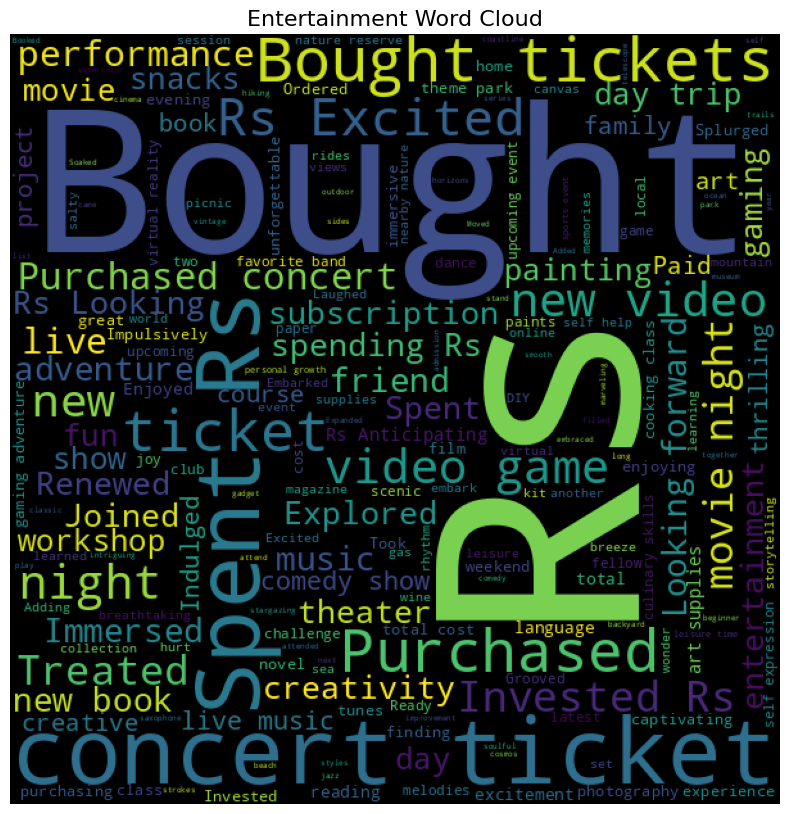

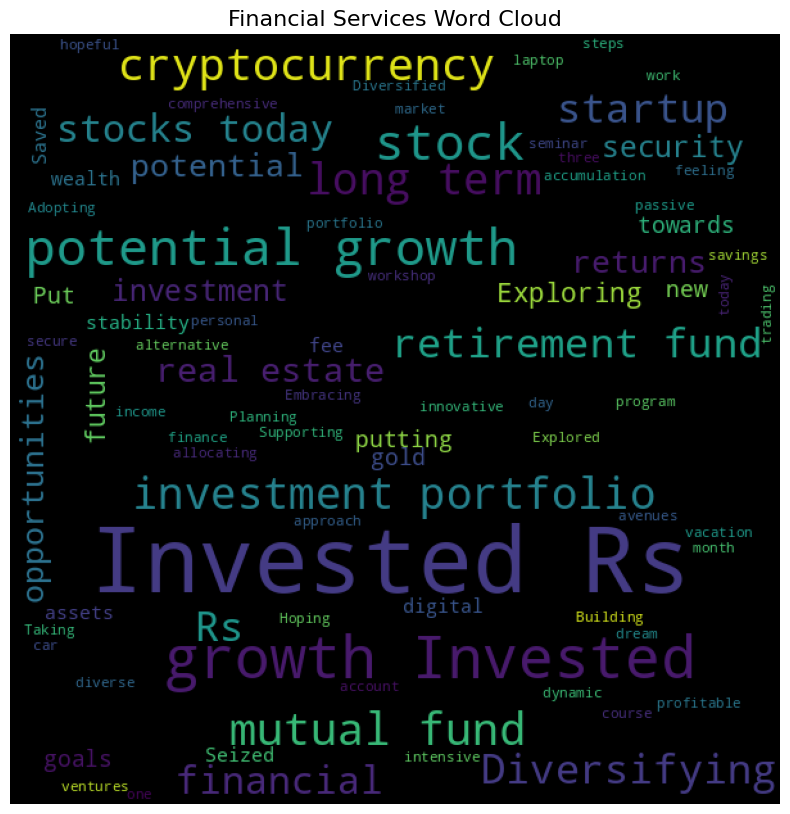

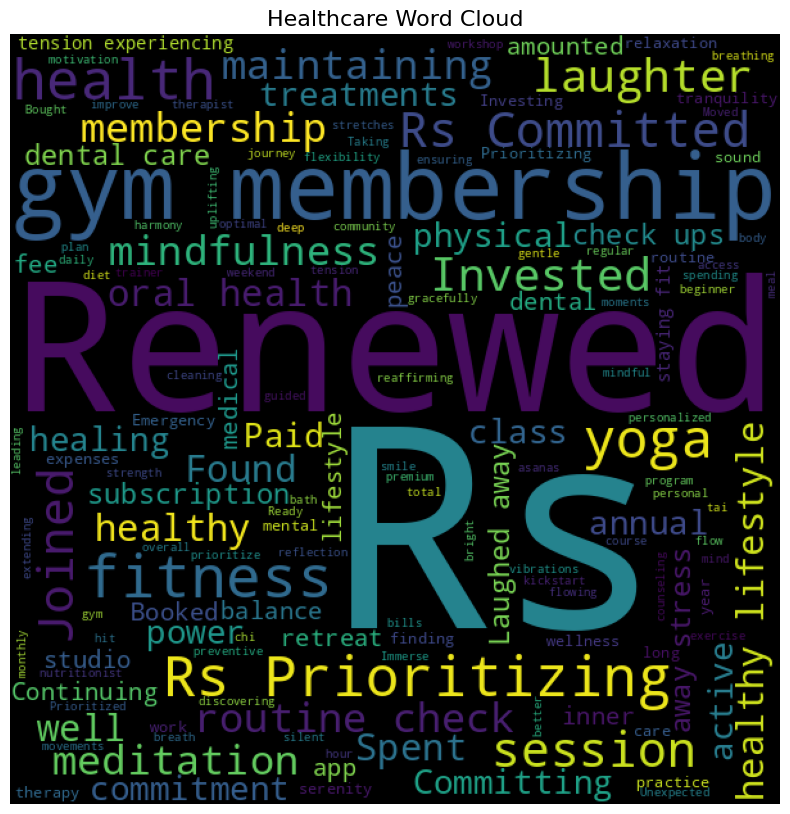

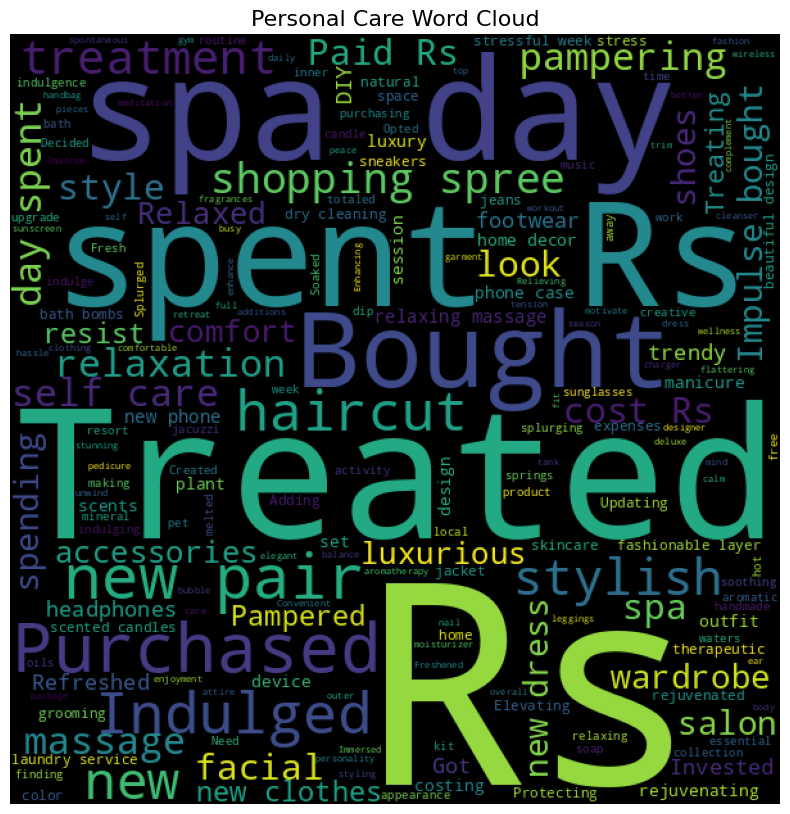

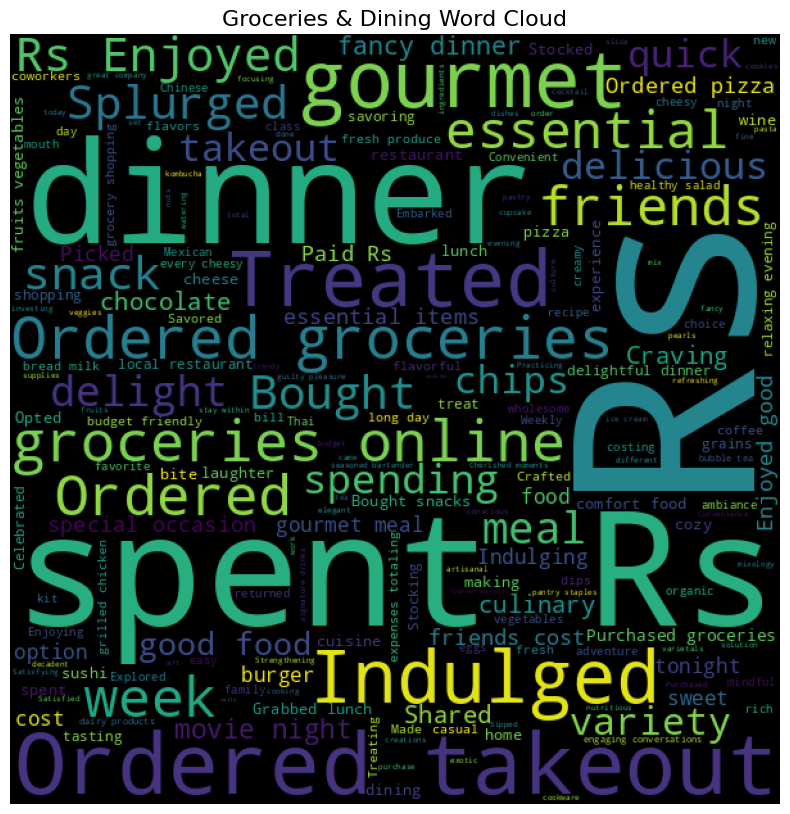

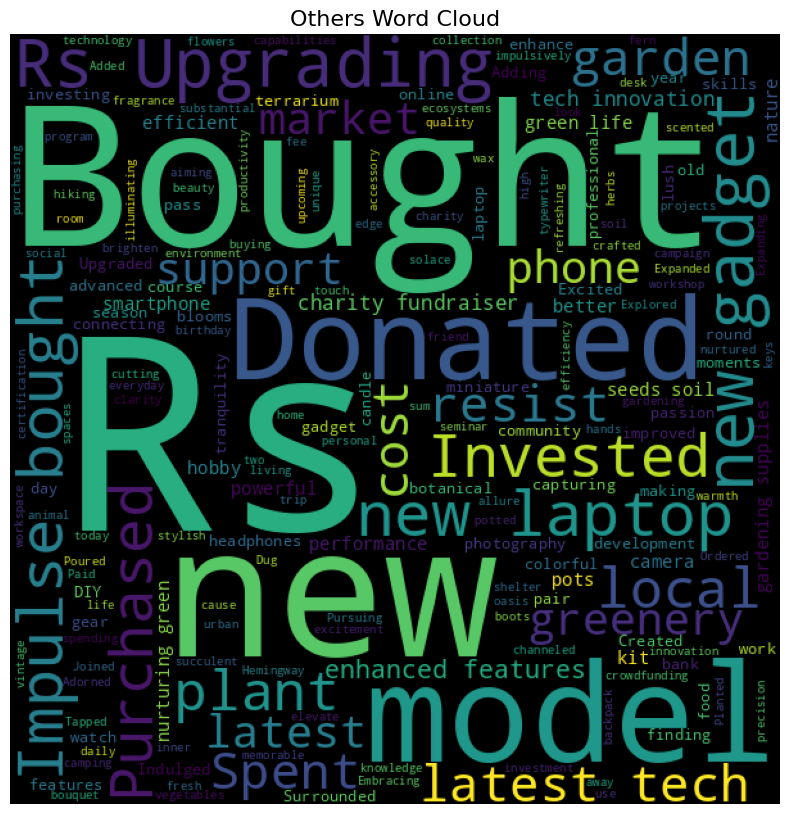

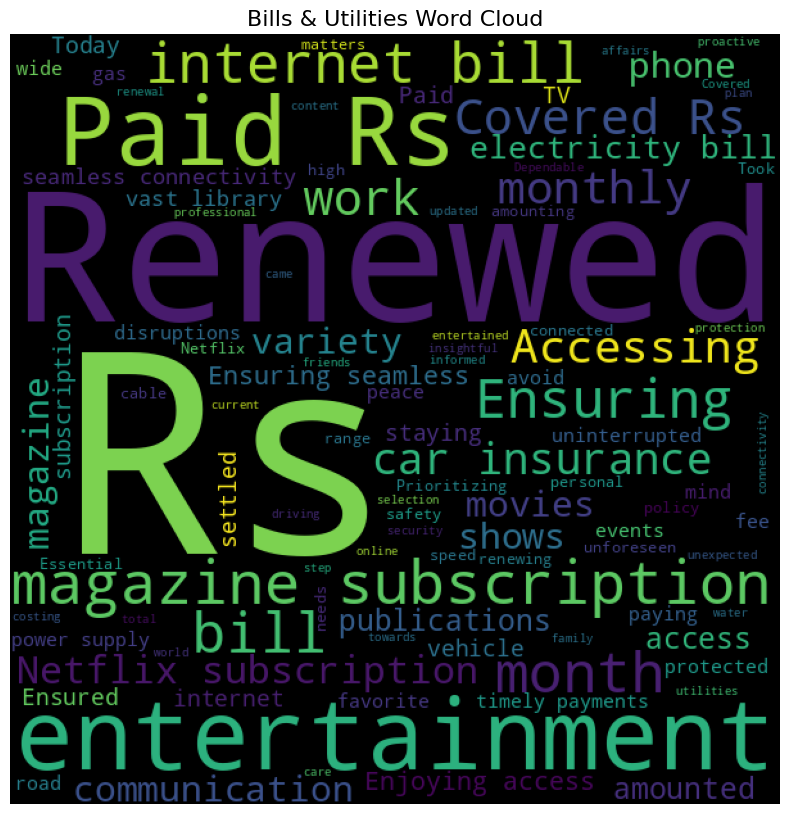

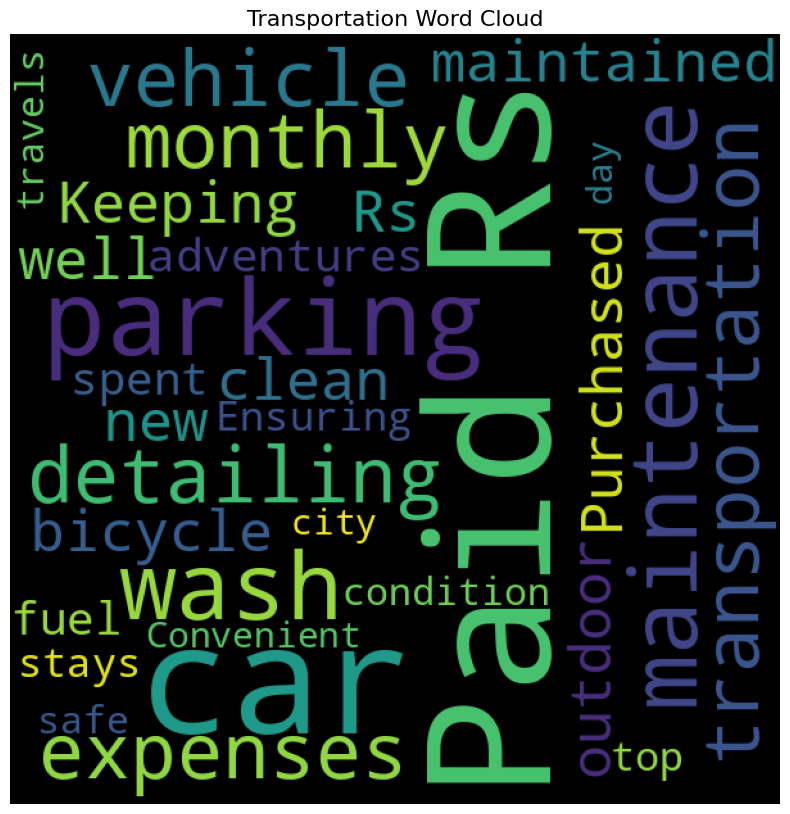

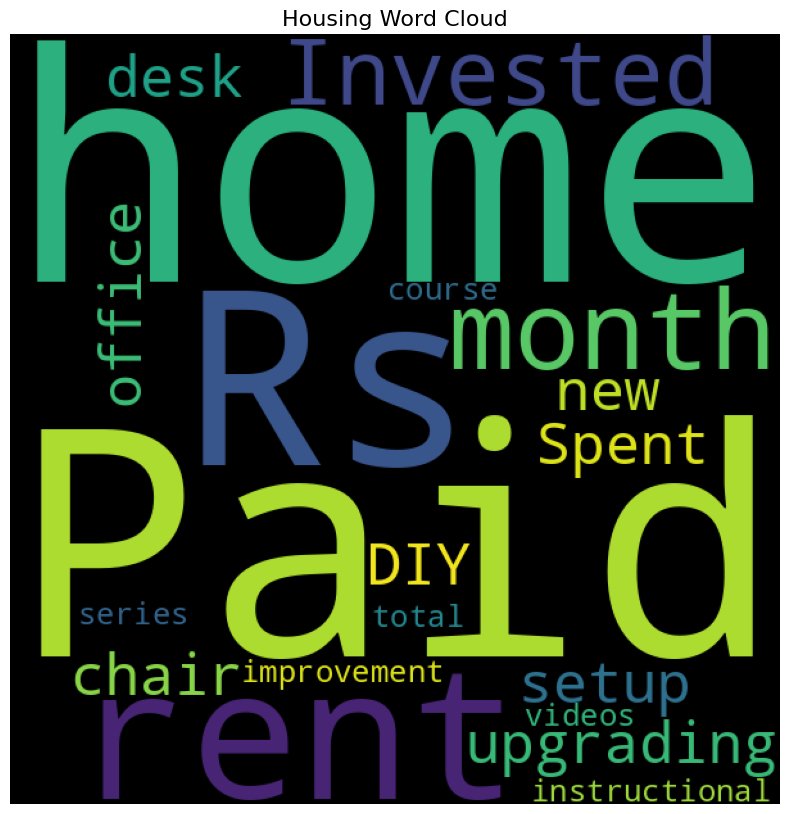

In [ ]:
emotions_list = train_data['Categorical_Emotion'].unique()
for emotion in emotions_list:
    text = ' '.join([sentence for sentence in train_data.loc[train_data['Categorical_Emotion'] == emotion,'Comment']])
    wordcloud = WordCloud(width = 600, height = 600).generate(text)
    words_cloud(wordcloud, emotion)

In [15]:
lb = LabelEncoder()
train_data['Psy_Emotion'] = lb.fit_transform(train_data['Psy_Emotion'])
#train_data['Categorical_Emotion'] = lb.fit_transform(train_data['Categorical_Emotion'])

In [16]:
df = train_data.copy()
df.tail()

Comment  Psy_Emotion  length
998   Invested in a new laptop for remote work. The ...            3      84
999   Renewed my gym membership for Rs 2469. Committ...            6      76
1000             Renewed my gym membership for Rs 1899.            6      38
1001  Indulged in a fancy dinner for Rs 1979. Celebr...            1      91
1002                          Ordered pizza for Rs 239.            6      25

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df['Comment'], df['Psy_Emotion'], test_size = 0.2, random_state=42)

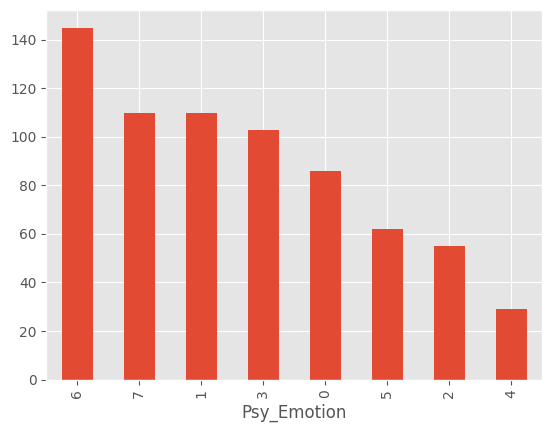

In [19]:
y_train.value_counts().plot(kind = 'bar') # Plotting the bar plot for visualizing the countness of positive and negative labels
plt.show()

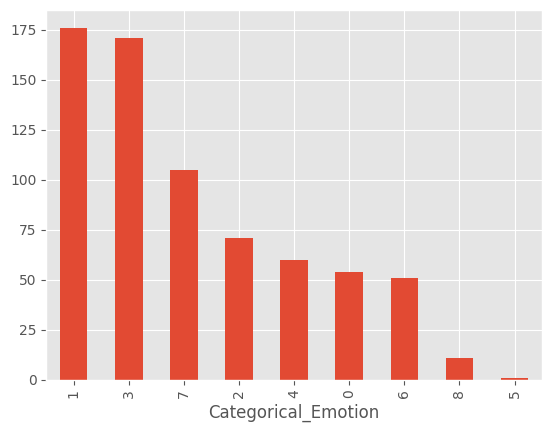

In [ ]:
y_train_cat.value_counts().plot(kind = 'bar') # Plotting the bar plot for visualizing the countness of positive and negative labels
plt.show()

In [20]:
## Perfoming the text preprocessing

nltk.download('stopwords')  # Downloading all the stopwords from the nltk library
pattern = re.compile('<.*?>')  # Pattern for removing the HTML tags
punctuation = string.punctuation   # Extracting all punctuation from the string library
ps = PorterStemmer()  # Creating a PorterStemmer object for the stemming purpose
tokenizer = Tokenizer() # Creating a Tokenizer object for representing the text into numeric form

def text_preprocess(text):

  text = re.sub(pattern,'',text)  # Removing the HTML tags using re library

  text = text.lower()  # Lower case all the character present in the text

  text = text.translate(str.maketrans('','',punctuation))   # Removing all the punctuation from the text

  text = text.split()    # word tokenize the text

  text = [word.replace('rs', '') for word in text]

  text = [ps.stem(word) for word in text if word not in stopwords.words('english')]  # Removing the stopwords from the text and stem each word

  return ' '.join(text)  # Join each word for the formation of clear text in string form

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
processed_train_data = [text_preprocess(words) for words in X_train]   # Applying the text pre-processing fuction to the text column of train dataset
processed_test_data = [text_preprocess(words) for words in X_test]   # Applying the text pre-processing fuction to the text column of test dataset

In [22]:
# Putting all the processed text of train data into a whole text. Then fit this whole text into the tokenizer for word embedding.

whole_text = ''

for i in processed_train_data:
  whole_text = whole_text + i


tokenizer.fit_on_texts([whole_text])
print(len(tokenizer.word_index))   # Printing the vocab size or the number of words present in the train data text. This is used as hyperparameter for the embedding layer.

1672


In [23]:
y_train

413    7
572    7
549    7
858    6
239    0
      ..
107    5
275    1
983    0
455    7
103    4
Name: Psy_Emotion, Length: 700, dtype: int64

In [24]:
# In this cell the train processed texts are converted into respective numeric sequences which are further padded to have equal sizes.

x_train_sequences = []

for i in processed_train_data:
  x_train_sequences.append(tokenizer.texts_to_sequences([i])[0])  # Each processed text is converted into sequences


x_train_padseq = pad_sequences(x_train_sequences,maxlen = 50, padding = 'post')  # Each sequences are padded to have equal size.

x_train = np.array(x_train_padseq)
y_train = np.array(to_categorical(y_train))
#y_train_cat = np.array(to_categorical(y_train_cat))

In [25]:
# In this cell the test processed texts are converted into respective numeric sequences which are further padded to have equal sizes.

x_test_sequences = []

for i in processed_test_data:
  x_test_sequences.append(tokenizer.texts_to_sequences([i])[0])     # Each processed text is converted into sequences


x_test_padseq = pad_sequences(x_test_sequences,maxlen = 50, padding = 'post')    # Each sequences are padded to have equal size.

x_test = np.array(x_test_padseq)
y_test = np.array(y_test)
#y_test_cat = np.array(y_test_cat)

In [26]:
y_test.shape

(176,)

In [110]:
## Defining the hyperparameter of the embedding layer

vocab_size = 1672   # vocabulary size of the tokenizer
dim = 50             # Number of dense vector dimension required for the output
sent_length = 50    # The length of each sequence

In [119]:
# Bi-LSTM Model

input_layer_lstm = Input(shape=(sent_length,))
embedding_layer_lstm = Embedding(input_dim=vocab_size, output_dim=dim)(input_layer_lstm)
spatial_dropout_layer = SpatialDropout1D(0.2)(embedding_layer_lstm)
lstm_layer = Bidirectional(LSTM(256))(spatial_dropout_layer)
dropout_layer = Dropout(0.3)(lstm_layer)
normalized_layer = BatchNormalization()(dropout_layer)
psych_output = Dense(8, activation='softmax', name='psych_output')(normalized_layer)
#cat_output = Dense(9, activation='softmax', name='cat_output')(lstm_layer)

In [120]:
# Create the model
bidirectional_lstm_model = Model(inputs=input_layer_lstm, outputs=[psych_output])

bidirectional_lstm_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

bidirectional_lstm_model.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 50)]              0         
                                                                 
 embedding_20 (Embedding)    (None, 50, 50)            83600     
                                                                 
 spatial_dropout1d_15 (Spat  (None, 50, 50)            0         
 ialDropout1D)                                                   
                                                                 
 bidirectional_19 (Bidirect  (None, 512)               628736    
 ional)                                                          
                                                                 
 dropout_19 (Dropout)        (None, 512)               0         
                                                                 
 batch_normalization_19 (Ba  (None, 512)               204

In [121]:
checkpoint_filepath = 'best_model_bi_lstm.h5'

# Create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',  # Monitor validation accuracy
    save_best_only=True,  # Save only the best model based on the monitored metric
    mode='max',  # Mode 'min' for validation loss, 'max' for validation accuracy
    verbose=1  # Print information about saving checkpoints
)

# Create the EarlyStopping callback
early_stopping_callback = EarlyStopping(
    monitor='val_accuracy',  # Monitor validation loss
    patience=2,  # Number of epochs with no improvement after which training will be stopped
    verbose=1,  # Print information about early stopping
    restore_best_weights=True  # Restore the best model weights based on validation loss
)

# Create the ReduceLROnPlateau callback
reduce_lr_callback = ReduceLROnPlateau(
    monitor='val_accuracy',  # Monitor validation loss
    factor=0.2,  # Factor by which the learning rate will be reduced
    patience=3,  # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-6,  # Minimum learning rate allowed
    verbose=1  # Print information about reducing learning rate
)

In [122]:
# Train the model
bidirectional_lstm_model_history = bidirectional_lstm_model.fit(x_train, y_train, epochs=20, batch_size=16, validation_split=0.2, callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback])


Epoch 1/20
33/35 [===========================>..] - ETA: 0s - loss: 1.7897 - accuracy: 0.3466
Epoch 1: val_accuracy improved from -inf to 0.45000, saving model to best_model_bi_lstm.h5
35/35 [==============================] - 8s 105ms/step - loss: 1.7562 - accuracy: 0.3607 - val_loss: 1.9871 - val_accuracy: 0.4500 - lr: 0.0010
Epoch 2/20
32/35 [==========================>...] - ETA: 0s - loss: 0.8687 - accuracy: 0.7227
Epoch 2: val_accuracy improved from 0.45000 to 0.54286, saving model to best_model_bi_lstm.h5
35/35 [==============================] - 2s 63ms/step - loss: 0.8500 - accuracy: 0.7304 - val_loss: 1.8812 - val_accuracy: 0.5429 - lr: 0.0010
Epoch 3/20
35/35 [==============================] - ETA: 0s - loss: 0.4630 - accuracy: 0.8536
Epoch 3: val_accuracy improved from 0.54286 to 0.58571, saving model to best_model_bi_lstm.h5
35/35 [==============================] - 1s 31ms/step - loss: 0.4630 - accuracy: 0.8536 - val_loss: 1.7968 - val_accuracy: 0.5857 - lr: 0.0010
Epoch 4/2

In [124]:
# Bi-GRU Model

input_layer_gru = Input(shape=(sent_length,))
embedding_layer_gru = Embedding(input_dim=vocab_size, output_dim=dim)(input_layer_gru)
spatial_dropout_layer = SpatialDropout1D(0.2)(embedding_layer_gru)
gru_layer = Bidirectional(GRU(256))(spatial_dropout_layer)
dropout_layer = Dropout(0.3)(gru_layer)
normalized_layer = BatchNormalization()(dropout_layer)
psych_output = Dense(8, activation='softmax', name='psych_output')(normalized_layer)
#cat_output = Dense(9, activation='softmax', name='cat_output')(gru_layer)

In [125]:
# Create the model
bidirectional_gru_model = Model(inputs=input_layer_gru, outputs=[psych_output])

bidirectional_gru_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

bidirectional_gru_model.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 50)]              0         
                                                                 
 embedding_22 (Embedding)    (None, 50, 50)            83600     
                                                                 
 spatial_dropout1d_17 (Spat  (None, 50, 50)            0         
 ialDropout1D)                                                   
                                                                 
 bidirectional_21 (Bidirect  (None, 512)               473088    
 ional)                                                          
                                                                 
 dropout_21 (Dropout)        (None, 512)               0         
                                                                 
 batch_normalization_21 (Ba  (None, 512)               204

In [126]:
checkpoint_filepath = 'best_model_bi_gru.h5'

# Create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',  # Monitor validation loss
    save_best_only=True,  # Save only the best model based on the monitored metric
    mode='max',  # Mode 'min' for validation loss, 'max' for validation accuracy
    verbose=1  # Print information about saving checkpoints
)

# Create the EarlyStopping callback
early_stopping_callback = EarlyStopping(
    monitor='val_accuracy',  # Monitor validation loss
    patience=2,  # Number of epochs with no improvement after which training will be stopped
    verbose=1,  # Print information about early stopping
    restore_best_weights=True  # Restore the best model weights based on validation loss
)

# Create the ReduceLROnPlateau callback
reduce_lr_callback = ReduceLROnPlateau(
    monitor='val_accuracy',  # Monitor validation loss
    factor=0.2,  # Factor by which the learning rate will be reduced
    patience=3,  # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-6,  # Minimum learning rate allowed
    verbose=1  # Print information about reducing learning rate
)

In [127]:
# Train the model
bidirectional_gru_model_history = bidirectional_gru_model.fit(x_train, y_train, epochs=20, batch_size=16, validation_split=0.2, callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback])


Epoch 1/20
35/35 [==============================] - ETA: 0s - loss: 1.5248 - accuracy: 0.4929
Epoch 1: val_accuracy improved from -inf to 0.47857, saving model to best_model_bi_gru.h5
35/35 [==============================] - 8s 106ms/step - loss: 1.5248 - accuracy: 0.4929 - val_loss: 1.9548 - val_accuracy: 0.4786 - lr: 0.0010
Epoch 2/20
33/35 [===========================>..] - ETA: 0s - loss: 0.7441 - accuracy: 0.7443
Epoch 2: val_accuracy improved from 0.47857 to 0.53571, saving model to best_model_bi_gru.h5
35/35 [==============================] - 1s 42ms/step - loss: 0.7352 - accuracy: 0.7464 - val_loss: 1.8615 - val_accuracy: 0.5357 - lr: 0.0010
Epoch 3/20
33/35 [===========================>..] - ETA: 0s - loss: 0.4569 - accuracy: 0.8617
Epoch 3: val_accuracy improved from 0.53571 to 0.62143, saving model to best_model_bi_gru.h5
35/35 [==============================] - 1s 32ms/step - loss: 0.4655 - accuracy: 0.8536 - val_loss: 1.7727 - val_accuracy: 0.6214 - lr: 0.0010
Epoch 4/20
3

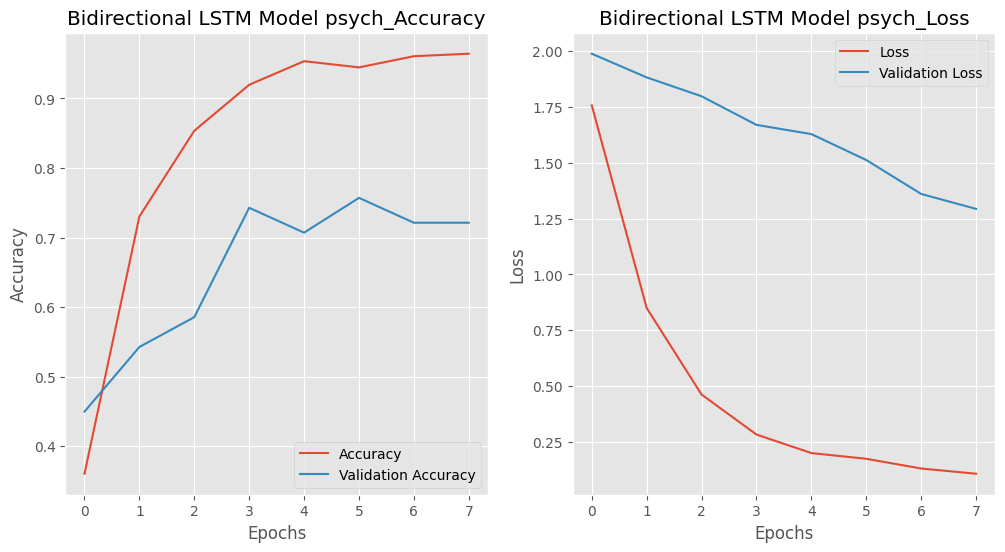

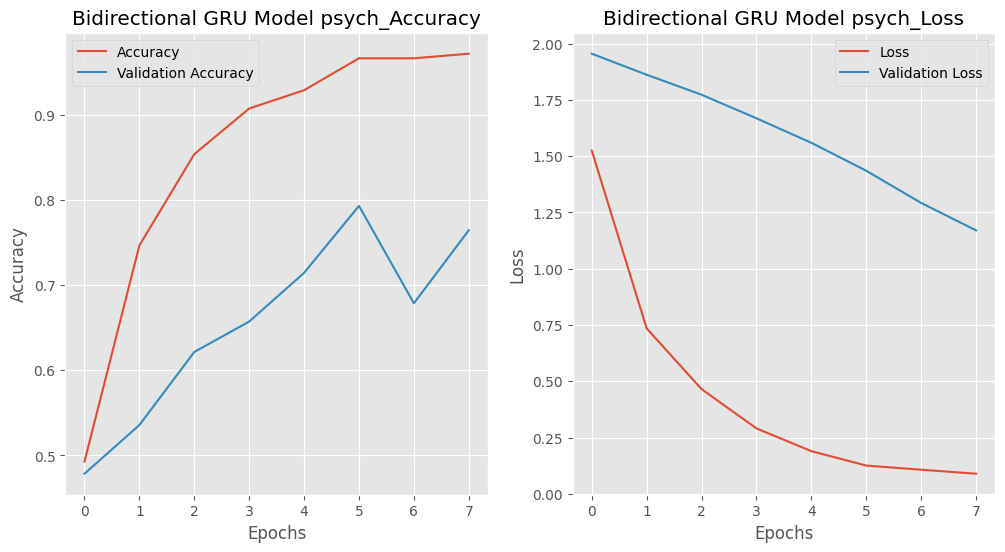

In [128]:
# Setting the figure size of the plot
plt.figure(figsize=(12,6))


# Plotting the psych_accuracy plot of Bidirectional LSTM model
plt.subplot(1,2,1)
plt.title("Bidirectional LSTM Model psych_Accuracy")
plt.plot(bidirectional_lstm_model_history.history['accuracy'],label='Accuracy')
plt.plot(bidirectional_lstm_model_history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()


# Plotting the psych_loss plot of Bidirectional LSTM model
plt.subplot(1,2,2)
plt.title("Bidirectional LSTM Model psych_Loss")
plt.plot(bidirectional_lstm_model_history.history['loss'],label='Loss')
plt.plot(bidirectional_lstm_model_history.history['val_loss'],label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# # Plotting the cat_accuracy plot of Bidirectional LSTM model
# plt.figure(figsize=(12,6))
# plt.subplot(1,2,1)
# plt.title("Bidirectional LSTM Model cat_Accuracy")
# plt.plot(bidirectional_lstm_model_history.history['cat_output_accuracy'],label='Accuracy')
# plt.plot(bidirectional_lstm_model_history.history['val_cat_output_accuracy'],label='Validation Accuracy')
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
# plt.legend()


# # Plotting the cat_loss plot of Bidirectional LSTM model
# plt.subplot(1,2,2)
# plt.title("Bidirectional LSTM Model cat_Loss")
# plt.plot(bidirectional_lstm_model_history.history['cat_output_loss'],label='Loss')
# plt.plot(bidirectional_lstm_model_history.history['val_cat_output_loss'],label='Validation Loss')
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.legend()
# plt.show()

# Plotting the psych_accuracy plot of Bidirectional GRU model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Bidirectional GRU Model psych_Accuracy")
plt.plot(bidirectional_gru_model_history.history['accuracy'],label='Accuracy')
plt.plot(bidirectional_gru_model_history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Plotting the psych_loss plot of Bidirectional GRU model
plt.subplot(1,2,2)
plt.title("Bidirectional GRU Model psych_Loss")
plt.plot(bidirectional_gru_model_history.history['loss'],label='Loss')
plt.plot(bidirectional_gru_model_history.history['val_loss'],label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# # Plotting the cat_accuracy plot of Bidirectional GRU model
# plt.figure(figsize=(12,6))
# plt.subplot(1,2,1)
# plt.title("Bidirectional GRU Model cat_Accuracy")
# plt.plot(bidirectional_gru_model_history.history['cat_output_accuracy'],label='Accuracy')
# plt.plot(bidirectional_gru_model_history.history['val_cat_output_accuracy'],label='Validation Accuracy')
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
# plt.legend()

# # Plotting the cat_loss plot of Bidirectional GRU model
# plt.subplot(1,2,2)
# plt.title("Bidirectional GRU Model cat_Loss")
# plt.plot(bidirectional_gru_model_history.history['cat_output_loss'],label='Loss')
# plt.plot(bidirectional_gru_model_history.history['val_cat_output_loss'],label='Validation Loss')
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.legend()
# plt.show()

In [129]:
# Predicting the output of each model on test data for model evaluation
# ----------------------------------------------------------------------
y_pred_bilstm = bidirectional_lstm_model.predict(x_test)
y_pred_bigru = bidirectional_gru_model.predict(x_test)

# y_pred_bilstm_psych = y_pred_bilstm
# #y_pred_bilstm_cat = y_pred_bilstm[1]

# y_pred_bigru_psych = y_pred_bigru
# #y_pred_bigru_cat = y_pred_bigru[1]

6/6 [==============================] - 1s 6ms/step


In [130]:
# Converting the continuous output model into discrete classes
# ---------------------------------------------------------------------
y_pred_bilstm_psych = np.array([np.argmax(x) for x in y_pred_bilstm])
#y_pred_bilstm_cat = np.array([np.argmax(x) for x in y_pred_bilstm_cat])

y_pred_bigru_psych = np.array([np.argmax(x) for x in y_pred_bigru])
#y_pred_bigru_cat = np.array([np.argmax(x) for x in y_pred_bigru_cat])

In [131]:
y_pred_bilstm_psych

array([1, 6, 5, 2, 3, 0, 5, 7, 2, 6, 2, 6, 0, 6, 1, 2, 0, 7, 6, 1, 7, 6,
       5, 6, 7, 0, 1, 6, 7, 1, 0, 5, 6, 6, 3, 3, 7, 7, 6, 7, 7, 1, 4, 7,
       0, 6, 1, 5, 3, 6, 6, 1, 4, 3, 0, 7, 6, 7, 3, 6, 5, 6, 5, 6, 6, 0,
       7, 0, 6, 5, 1, 3, 2, 3, 5, 5, 7, 1, 7, 6, 6, 1, 5, 6, 6, 0, 6, 7,
       6, 6, 1, 0, 0, 1, 2, 5, 0, 7, 0, 7, 1, 5, 1, 7, 7, 1, 3, 7, 7, 1,
       2, 6, 1, 7, 6, 5, 7, 5, 6, 4, 1, 5, 1, 6, 7, 6, 3, 7, 5, 7, 7, 6,
       0, 6, 0, 1, 7, 0, 7, 6, 7, 1, 6, 0, 3, 6, 6, 6, 6, 0, 5, 5, 1, 5,
       3, 6, 1, 7, 5, 7, 7, 3, 1, 5, 1, 3, 2, 7, 7, 0, 3, 6, 3, 5, 5, 3])

In [132]:
# Predicting the accuracy_score,f1_score,recall_score,precision_score of each model
# Then converting all the details into dataframe


result = {"Model Name":['Bidirectional LSTM',"Bidirectional GRU"],
         "Psy Accuracy Score":[accuracy_score(y_test,y_pred_bilstm_psych),accuracy_score(y_test,y_pred_bigru_psych)],
         #"Cat Accuracy Score":[accuracy_score(y_test_cat,y_pred_bilstm_cat),accuracy_score(y_test_cat,y_pred_bigru_cat)],
         "Psy F1 Score(macro)":[f1_score(y_test,y_pred_bilstm_psych,average='macro'),f1_score(y_test,y_pred_bigru_psych,average='macro')],
         #"Cat F1 Score(macro)":[f1_score(y_test_cat,y_pred_bilstm_cat,average='macro'),f1_score(y_test_cat,y_pred_bigru_cat,average='macro')],
         "Psy Recall Score(macro)":[recall_score(y_test,y_pred_bilstm_psych,average='macro'),recall_score(y_test,y_pred_bigru_psych,average='macro')],
         #"Cat Recall Score(macro)":[recall_score(y_test_cat,y_pred_bilstm_cat,average='macro'),recall_score(y_test_cat,y_pred_bigru_cat,average='macro')],
         "Psy Precision Score(macro)":[precision_score(y_test,y_pred_bilstm_psych,average='macro'),precision_score(y_test,y_pred_bigru_psych,average='macro')],
         #"Cat Precision Score(macro)":[precision_score(y_test_cat,y_pred_bilstm_cat,average='macro'),precision_score(y_test_cat,y_pred_bigru_cat,average='macro')],
         "Psy F1 Score(micro)":[f1_score(y_test,y_pred_bilstm_psych,average='micro'),f1_score(y_test,y_pred_bigru_psych,average='micro')],
         #"Cat F1 Score(micro)":[f1_score(y_test_cat,y_pred_bilstm_cat,average='micro'),f1_score(y_test_cat,y_pred_bigru_cat,average='micro')],
         "Psy Recall Score(micro)":[recall_score(y_test,y_pred_bilstm_psych,average='micro'),recall_score(y_test,y_pred_bigru_psych,average='micro')],
         #"Cat Recall Score(micro)":[recall_score(y_test_cat,y_pred_bilstm_cat,average='micro'),recall_score(y_test_cat,y_pred_bigru_cat,average='micro')],
         "Psy Precision Score(micro)":[precision_score(y_test,y_pred_bilstm_psych,average='micro'),precision_score(y_test,y_pred_bigru_psych,average='micro')],
         #"Cat Precision Score(micro)":[precision_score(y_test_cat,y_pred_bilstm_cat,average='micro'),precision_score(y_test_cat,y_pred_bigru_cat,average='micro')],
        }

result_df = pd.DataFrame(result)

result_df.to_excel("Report of Trained Model.xlsx")

display(result_df)

Model Name  Psy Accuracy Score  Psy F1 Score(macro)  \
0  Bidirectional LSTM            0.778409             0.752576   
1   Bidirectional GRU            0.778409             0.753011   

   Psy Recall Score(macro)  Psy Precision Score(macro)  Psy F1 Score(micro)  \
0                 0.738954                    0.811565             0.778409   
1                 0.721798                    0.819653             0.778409   

   Psy Recall Score(micro)  Psy Precision Score(micro)  
0                 0.778409                    0.778409  
1                 0.778409                    0.778409

In [133]:
# Making a predictive function which takes the input as text and in output it provide the emotion of the text

def predict_emotion_of_text(text):

    processed_text = text_preprocess(text)
    text_to_sequence = tokenizer.texts_to_sequences([processed_text])[0]
    padded_sequence = pad_sequences([text_to_sequence],maxlen = 50, padding = 'post')

    prediction = bidirectional_lstm_model.predict(padded_sequence)    # We can use any model from  above like Bidirection LSTM, LSTM, Stack LSTM, GRU, Stack GRU Or Bidirectional GRU. As the accuracy of Bidirectional is more. So in this case I have Choose this model in predictive system.

    classes_psy = ['Aspiration Focused','Emotional Comfort','Essential Need','Experiential Investment','Impulse Buy','Mindful Spending','Routine Expense','Social Outlay']
    #classes_cat = ['Bills & Utilities','Entertainment','Financial Services','Groceries & Dining','Healthcare','Housing','Others','Personal Care','Transportation']

    print("Input: ",text)
    print("Output: ",classes_psy[np.argmax(prediction)])
    #print("Output: ",classes_cat[np.argmax(prediction[1])])
    print("\n")

In [134]:
predict_emotion_of_text("Today, I settled the monthly electricity bill. It amounted to Rs 5821. Ensuring timely payments to avoid any disruptions in power supply")
predict_emotion_of_text("Bought a new pair of shoes for Rs 4000.")


1/1 [==============================] - 0s 21ms/step
Input:  Today, I settled the monthly electricity bill. It amounted to Rs 5821. Ensuring timely payments to avoid any disruptions in power supply
Output:  Essential Need


1/1 [==============================] - 0s 20ms/step
Input:  Bought a new pair of shoes for Rs 4000.
Output:  Mindful Spending




In [135]:
with open('tokenizer.pickle','wb') as handle:
  pickle.dump(tokenizer,handle,protocol = pickle.HIGHEST_PROTOCOL)

In [136]:

bidirectional_gru_model.save('bi_gru_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
